In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("churn_data_st.csv")
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [25]:
df1 = df.copy()

In [27]:
df1 = df1[['customerID', 'SeniorCitizen', 'tenure', 'ServiceCount' ,'Contract', 'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'Churn']]

In [28]:
df1.head()

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [30]:
df1.isna().sum()

customerID           0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [31]:
print("Rows  :",df1.shape[0])
print("Columns  :",df1.shape[1])
print("\nFeatures :\n", df1.columns.tolist())
print("\nMissing values :\n",df1.isnull().any())
print("\nunique values :\n", df1.nunique())

Rows  : 7043
Columns  : 9

Features :
 ['customerID', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :
 customerID          False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

unique values :
 customerID          7043
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [32]:
df1[df1.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,0,19,7,One year,No,18.80,NaN,No


In [33]:
df1.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

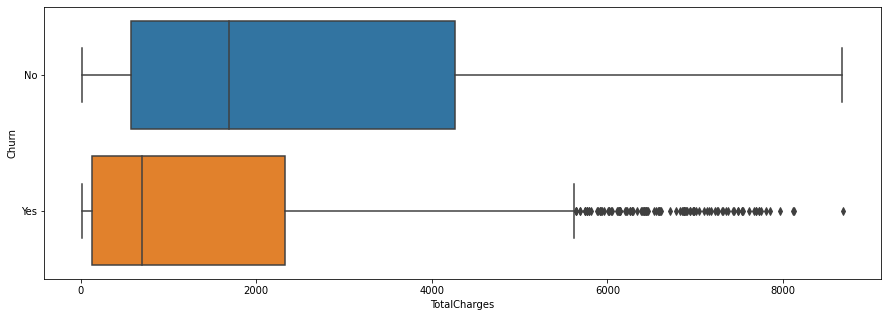

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=df1)

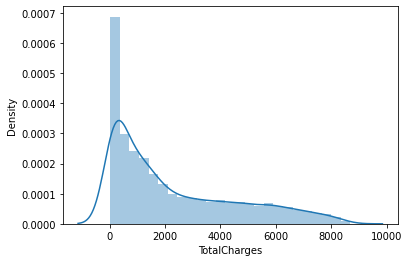

In [36]:
sns.distplot(df1['TotalCharges'], hist=True)

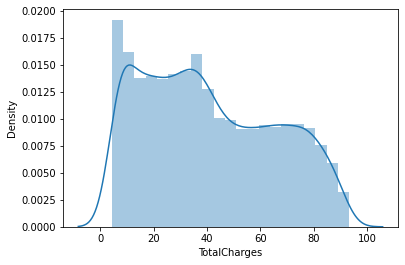

In [37]:
sns.distplot(df1['TotalCharges'].apply(np.sqrt), hist=True)


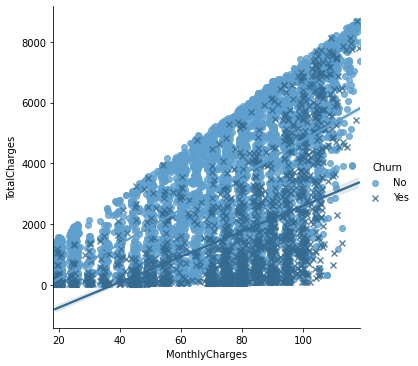

In [38]:

sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df1,fit_reg=True, hue="Churn", markers=["o", "x"], palette="Blues_d")

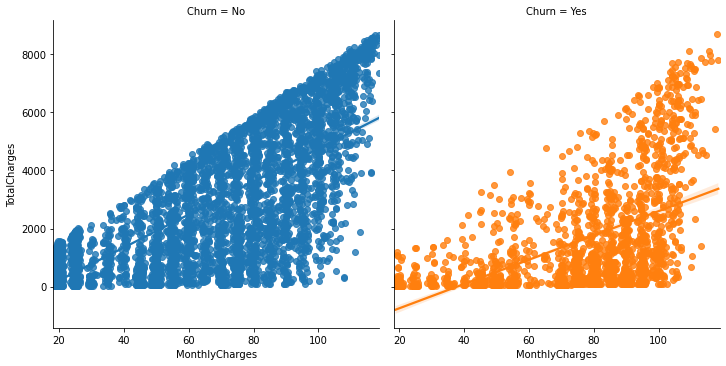

In [39]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df1,fit_reg=True, col="Churn", hue="Churn")

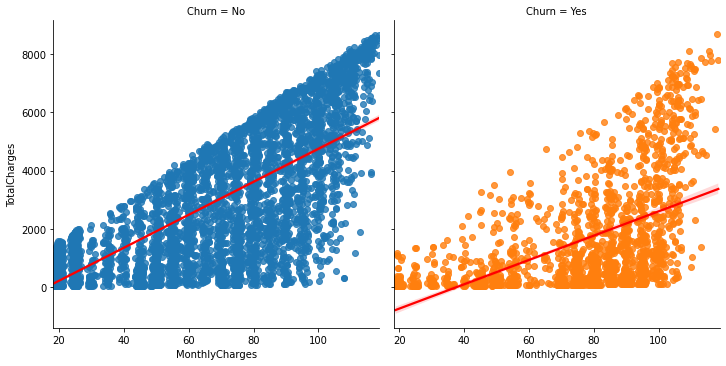

In [40]:

sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df1,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [41]:
churn_no_df=df1[(df1['Churn']=='No') & (df1['TotalCharges'].isna()==False)]

In [42]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [43]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  56.73637552696062
intercept  :  -922.8160085118097
r_value :   0.7573902887184033
p_value :   0.0
std_err :   0.6819261867835148
R-squared:  0.5736400494449463


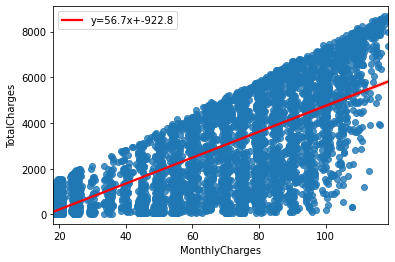

In [44]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

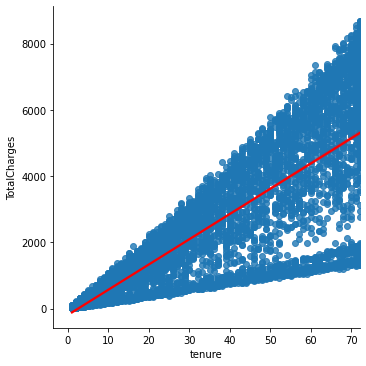

In [46]:
sns.lmplot(x='tenure',y='TotalCharges',data=df1,fit_reg=True, line_kws={'color':'red'})

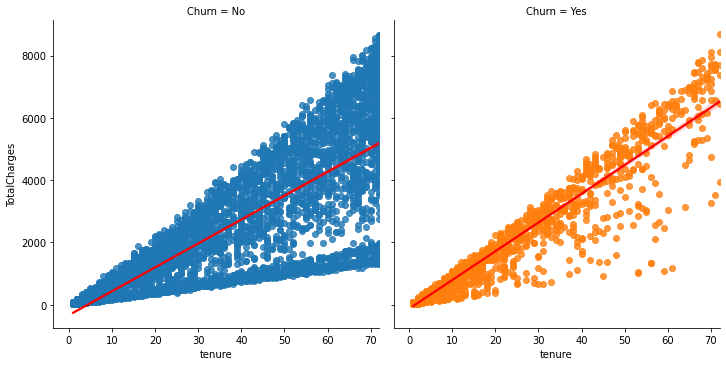

In [47]:

sns.lmplot(x='tenure',y='TotalCharges',data=df1,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [48]:
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
churn_no_df.head()


,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


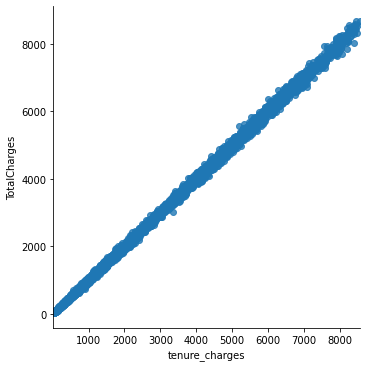

In [50]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_no_df)

In [52]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [53]:
churn_merged=pd.merge(df, churn_actual_df)

In [54]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,279.2
